In [6]:
import matplotlib.pyplot as plt

from IPython.display import display_latex
from alpsqutip.geometry import graph_from_alps_xml, list_graph_in_alps_xml
from alpsqutip.alpsmodels import list_operators_in_alps_xml,model_from_alps_xml
from alpsqutip.utils import eval_expr

from alpsqutip.model import SystemDescriptor

models_lib_file = "../alpsqutip/lib/models.xml"
lattice_lib_file = "../alpsqutip/lib/lattices.xml"

   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
   Bond term <<-t*fermion_hop__src_dst>> could not be evaluated. Aborting evaluation of fermion_kinetic_energy.


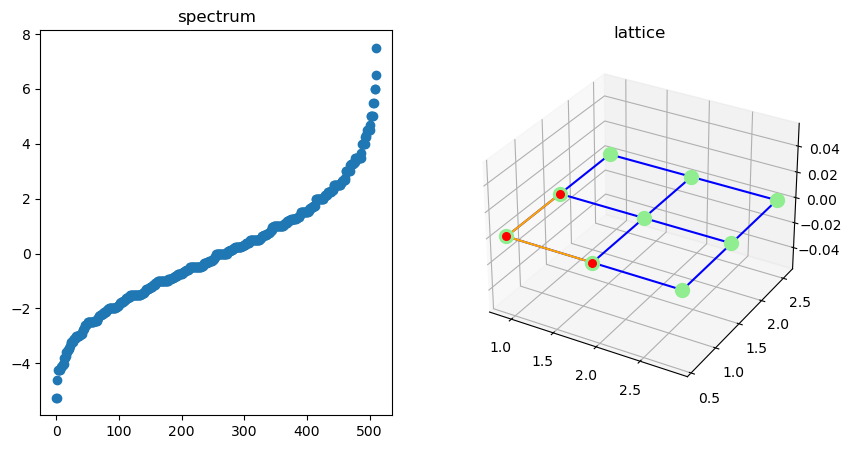

In [12]:

# Load a system
system = SystemDescriptor(
    model=model_from_alps_xml(models_lib_file,"spin"),
    graph=graph_from_alps_xml(lattice_lib_file, "open square lattice", parms={"L":3, "a":1}),
    parms={"h":1,"J":1}
         )
# enumerate the name of each subsystem
sites = [s for s in system.sites]

# Build some specific site and bond operators
exchange01=system.bond_operator("exchange_xy", sites[0], sites[1])
exchange10 =system.bond_operator("exchange_xy", sites[1], sites[0])
sz0 = system.site_operator("Sz",sites[0])
sz1 = system.site_operator("Sz",sites[1])
# Get the Hamiltonian 
H = system.global_operator("Hamiltonian")

# Plot the lattice and the spectrum
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)

# Convert to qutip and get the spectrum
spectrum = H.to_qutip().eigenenergies()
ax.scatter(range(len(spectrum)),sorted(spectrum))
ax.set_title("spectrum")
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title("lattice")
system.spec["graph"].draw(ax, node_spec={"0":{"c":"lightgreen","s":100}})
system.spec["graph"].subgraph((sites[0],sites[1],sites[3],)).draw(ax, node_spec={"0":{"c":"red","s":30}},
                                               edge_spec={"0":{"c":"orange"}})

   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
   Bond term <<-t*fermion_hop__src_dst>> could not be evaluated. Aborting evaluation of fermion_kinetic_energy.


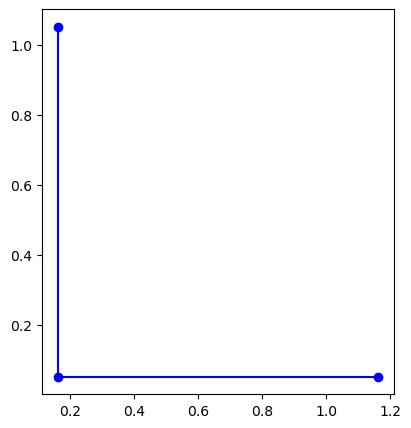

In [15]:
# Load a system
system = SystemDescriptor(
    model=model_from_alps_xml(models_lib_file,"spin"),
    graph=graph_from_alps_xml(lattice_lib_file, "open square lattice", parms={"L":3, "a":1}),
    parms={"h":1,"J":1}
         )
# enumerate the name of each subsystem
sites = [s for s in system.sites]

s01 = system.subsystem([sites[0],sites[1],sites[3]])
# Plot the lattice and the spectrum
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
s01.spec["graph"].draw(ax)

In [18]:
# Read a bond operator and compute its square
system.bond_operator("exchange", sites[1], sites[2])**2


(
  0 * (
   )
  +  0.25 * (
  ([[0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]] <-  1[1, 0])
  ([[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]] <-  1[2, 0]) )
  +  0.5 * (
  ([[ 0. +0.j  0. +0.j]
 [-0.5+0.j  0. +0.j]] <-  1[1, 0])
  ([[0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j]] <-  1[2, 0]) )
  +  0.25 * (
  ([[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]] <-  1[1, 0])
  ([[0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]] <-  1[2, 0]) )
  +  0 * (
   )
  +  0.5 * (
  ([[0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j]] <-  1[1, 0])
  ([[ 0. +0.j  0. +0.j]
 [-0.5+0.j  0. +0.j]] <-  1[2, 0]) )
  +  0.5 * (
  ([[0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j]] <-  1[1, 0])
  ([[ 0. +0.j -0.5+0.j]
 [ 0. +0.j  0. +0.j]] <-  1[2, 0]) )
  +  0.5 * (
  ([[ 0. +0.j -0.5+0.j]
 [ 0. +0.j  0. +0.j]] <-  1[1, 0])
  ([[0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j]] <-  1[2, 0]) )
  +  1 * (
  ([[0.25+0.j 0.  +0.j]
 [0.  +0.j 0.25+0.j]] <-  1[1, 0])
  ([[0.25+0.j 0.  +0.j]
 [0.  +0.j 0.25+0.j]] <-  1[2, 0]) )
)

In [19]:
# Models and local basis
models = list_operators_in_alps_xml(models_lib_file)

for name in models:
    print(name)
    try:
        model = model_from_alps_xml(models_lib_file, name, parms={"L":3, "W":3, "a":1,"b":1, "c":1, "Nmax":5})
        print("site types:", {name: lb["name"]  for name, lb in  model.site_basis.items()})
    except:
        print("   load failed")
    print(40*"-")

spinless fermion
site types: {'0': 'spinless fermion'}
----------------------------------------
spinless fermions
site types: {'0': 'spinless fermion'}
----------------------------------------
alternative fermion
site types: {'0': 'alternative fermion'}
----------------------------------------
Kondo lattice
site types: {'0': 'fermion', '1': 'spin'}
----------------------------------------
t-J
site types: {'0': 't-J'}
----------------------------------------
alternative t-J
site types: {'0': 'alternative t-J'}
----------------------------------------
spin
site types: {'0': 'spin'}
----------------------------------------
boson
site types: {'0': 'boson'}
----------------------------------------
fermion
site types: {'0': 'fermion'}
----------------------------------------
fermion Hubbard
site types: {'0': 'fermion'}
----------------------------------------
boson Hubbard
site types: {'0': 'boson'}
----------------------------------------
Ian's fermion Hubbard
site types: {'0': 'fermion'}
-

# Lattices in the library

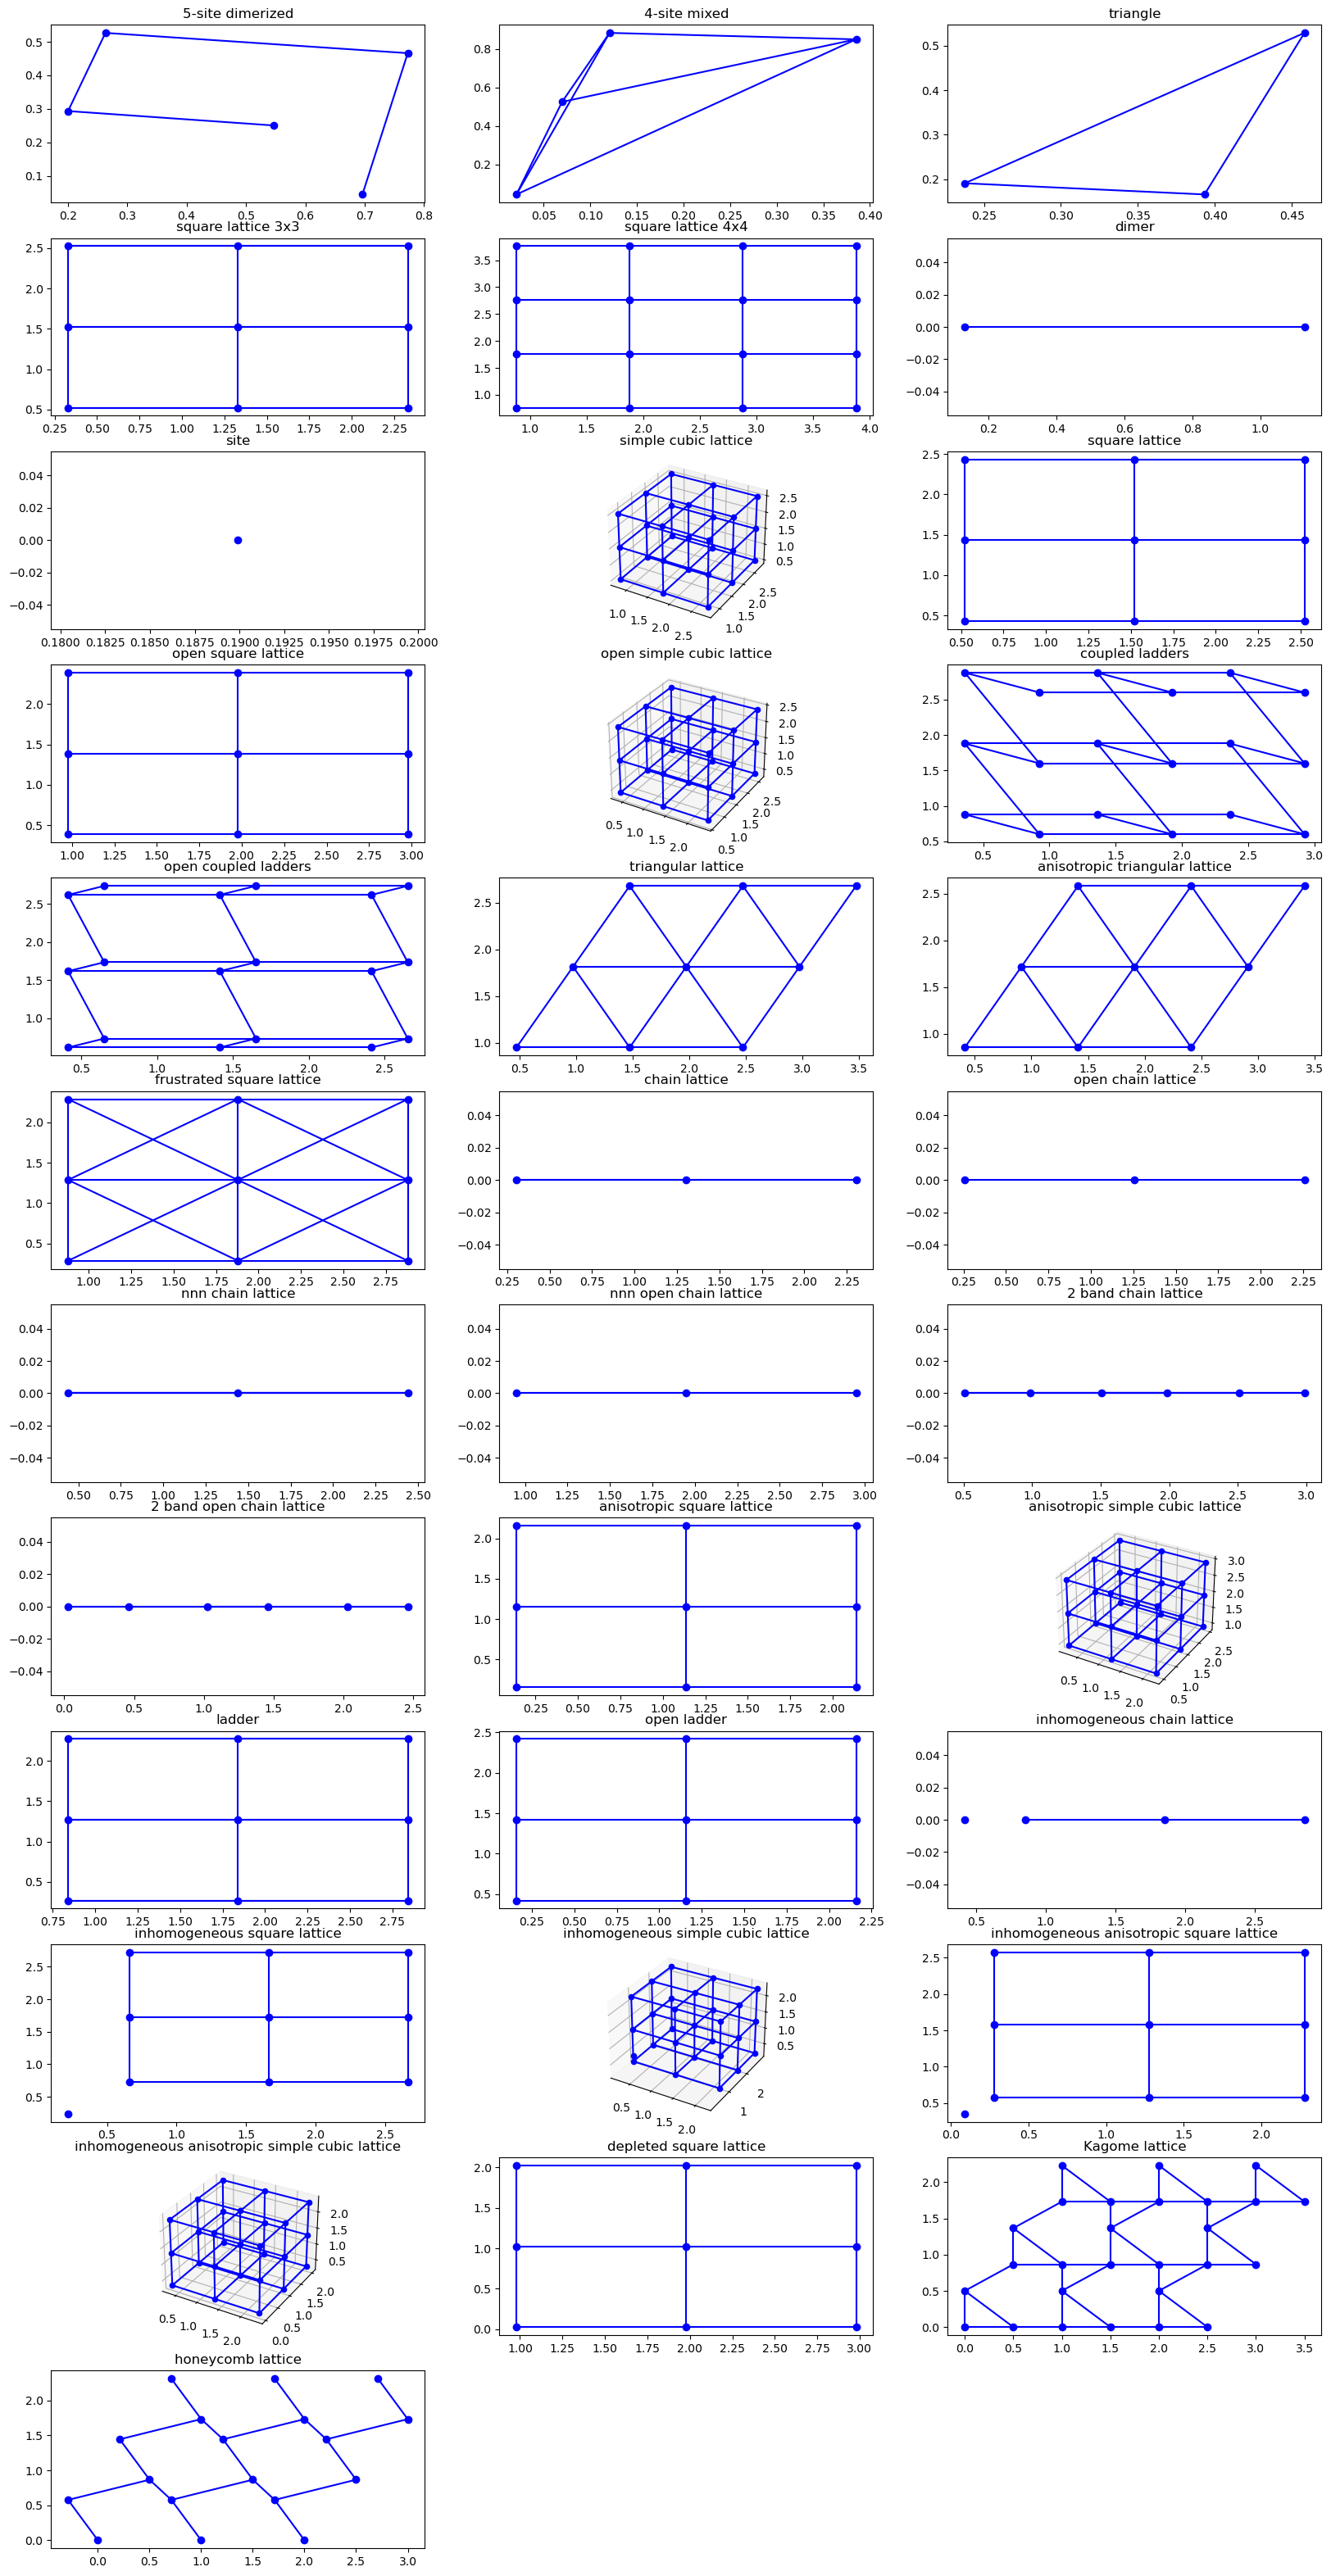

In [20]:

graphs = list_graph_in_alps_xml(lattice_lib_file)


fig = plt.figure(figsize=(20,40))
pos = 0
rows = (len(graphs)+2) //3
for name in graphs:
    pos += 1
    g = graph_from_alps_xml(lattice_lib_file, name, parms={"L":3, "W":3, "a":1,"b":1, "c":1})
    
    if g.lattice and g.lattice["dimension"] > 2:
        ax = fig.add_subplot(rows, 3, pos, projection='3d')
        ax.set_proj_type("persp")
    else:
        ax = fig.add_subplot(rows, 3, pos)
    ax.set_title(name)
    g.draw(ax)
plt.show()

In [ ]:
# Systems



models = list_operators_in_alps_xml(models_lib_file)
graphs = list_graph_in_alps_xml(lattice_lib_file)

for model_name in models:
    print(model_name, "\n", 10*"*")
    for graph_name in graphs:
        g = graph_from_alps_xml(lattice_lib_file, graph_name, parms={"L":3, "W":3, "a":1,"b":1, "c":1})
        model = model_from_alps_xml(models_lib_file, model_name, parms={"L":3, "W":3, "a":1,"b":1, "c":1, "Nmax":5})
        try:
            system = SystemDescriptor(g, model, {})
        except Exception as e:
            print("   ", graph_name, "  [Failed]", e)
            continue
        print("   ", graph_name, "  [OK]")
    print("-------------")

spinless fermion 
 **********
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
   Bond term <<-t*fermion_hop__src_dst>> could not be evaluated. Aborting evaluation of fermion_kinetic_energy.
    5-site dimerized   [OK]
    4-site mixed   [Failed] '1'
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
   Bond term <<-t*fermion_hop__src_dst>> could not be evaluated. Aborting evaluation of fermion_kinetic_energy.
    triangle   [OK]
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(b

   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
   Bond term <<-t*fermion_hop__src_dst>> could not be evaluated. Aborting evaluation of fermion_kinetic_energy.
    depleted square lattice   [OK]
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
   Bond term <<-t*fermion_hop__src_dst>> could not be evaluated. Aborting evaluation of fermion_kinetic_energy.
    Kagome lattice   [OK]
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be 

   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
   Bond term <<-t*fermion_hop__src_dst>> could not be evaluated. Aborting evaluation of fermion_kinetic_energy.
    inhomogeneous anisotropic simple cubic lattice   [OK]
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
   Bond term <<-t*fermion_hop__src_dst>> could not be evaluated. Aborting evaluation of fermion_kinetic_energy.
    depleted square lattice   [OK]
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+b

    2 band chain lattice   [Failed] '1'
    2 band open chain lattice   [Failed] '1'
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
   Bond term <<-t*fermion_hop__src_dst>> could not be evaluated. Aborting evaluation of fermion_kinetic_energy.
    anisotropic square lattice   [OK]
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
   Bond term <<-t*fermion_hop__src_dst>> could not be evaluated. Aborting evaluation of fermion_kinetic_energy.
    anisotropic simple cubic lattice   [OK]
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting

    open coupled ladders   [OK]
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
    triangular lattice   [OK]
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
   Bond term <<-t_prima*fermion_hop__src_dst>> could not be evaluated. Aborting evaluation of fermion_kinetic_energy.
    anisotropic triangular lattice   [OK]
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
   Bond

   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
    square lattice 3x3   [OK]
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
    square lattice 4x4   [OK]
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
    dimer   [OK]
    site   [OK]
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   B

    honeycomb lattice   [OK]
-------------
alternative t-J 
 **********
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
    5-site dimerized   [OK]
    4-site mixed   [Failed] '1'
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
    triangle   [OK]
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
    square lattice 3x3   [OK]
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchang

    depleted square lattice   [OK]
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
    Kagome lattice   [OK]
   Bond term <<Jz*Sz__src*Sz__dst+Jxy/2*exchange_xy__src_dst>> could not be evaluated. Aborting evaluation of spin_exchange_energy.
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
    honeycomb lattice   [OK]
-------------
spin 
 **********
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not be evaluated. Aborting evaluation of boson_kinetic_energy.
   Bond term <<-t*fermion_hop__src_dst>> could not be evaluated. Aborting evaluation of fermion_kinetic_energy.
    5-site dimerized   [OK]
    4-site mixed   [Failed] '1'
   Bond term <<-t*(bdag__src*b__dst+bdag__dst*b__src)>> could not b